# Energy Usage Prediction - Model Building

In [1]:
import pandas as pd
import numpy as np

## Load dataset

In [2]:
train_path = 'data/train.csv'
test_path = 'data/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
# replace 0s in year_built with np.nan
train_df.year_built = train_df.year_built.replace(0, np.nan)
test_df.year_built = test_df.year_built.replace(0, np.nan)

In [38]:
# check for duplicates
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


## Create X and y

In [56]:
X = train_df.drop(['site_eui', 'id'], axis=1)
y = train_df.site_eui

In [92]:
from sklearn import model_selection

X_train, X_val, y_train, y_val = model_selection.train_test_split(
    X, y, test_size=.1, random_state=25
)

In [180]:
X_test = test_df.drop(['id'], axis=1)

## Data preprocessing

In [121]:
from sklearn import pipeline
from sklearn import impute
from sklearn import preprocessing
from sklearn import compose

In [122]:
num_pipe = pipeline.Pipeline([
    ('median_imputer', impute.SimpleImputer(strategy="median")),
    ('standard_scaler', preprocessing.StandardScaler())
    ])

In [123]:
cat_pipe = pipeline.Pipeline([
    ('ohe', preprocessing.OneHotEncoder(min_frequency=.05, handle_unknown='ignore'))
])

In [124]:
# combine num_pipe and cat_pipe
preproc = compose.ColumnTransformer([
    ('num_pipe', num_pipe, X_train.select_dtypes(exclude=['object']).columns),
    ('cat_pipe', cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

In [125]:
preproc

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('median_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'm...
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'],
      dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=0.05))]),
                                 Index(['State_Factor', 'building_class', 'facility_type'], dtype='object'))])

In [87]:
# from sklearn import linear_model
# from sklearn import metrics

# model = linear_model.SGDRegressor(
#     loss = rmse,
#     early_stopping = True,
#     validation_fraction = .1,
#     n_iter_no_change = 5 
# )

In [88]:
# full_pipe = pipeline.make_pipeline(
#     preproc,
#     model
# )

In [127]:
X_train_preproc = pd.DataFrame(preproc.fit_transform(X_train), columns=preproc.get_feature_names_out())
X_val_preproc = pd.DataFrame(preproc.transform(X_val), columns=preproc.get_feature_names_out())

In [128]:
X_train_preproc.head(10)

,num_pipe__Year_Factor,num_pipe__floor_area,num_pipe__year_built,num_pipe__energy_star_rating,num_pipe__ELEVATION,num_pipe__january_min_temp,num_pipe__january_avg_temp,num_pipe__january_max_temp,num_pipe__february_min_temp,num_pipe__february_avg_temp,...,cat_pipe__State_Factor_State_2,cat_pipe__State_Factor_State_4,cat_pipe__State_Factor_State_6,cat_pipe__State_Factor_infrequent_sklearn,cat_pipe__building_class_Commercial,cat_pipe__building_class_Residential,cat_pipe__facility_type_Education_Other_classroom,cat_pipe__facility_type_Multifamily_Uncategorized,cat_pipe__facility_type_Office_Uncategorized,cat_pipe__facility_type_infrequent_sklearn
0,0.430191,-0.442469,1.722111,-1.344469,-0.347695,1.765087,1.586583,0.734321,1.612140,1.441798,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.927341,-0.327230,-0.821160,1.416306,-0.498010,1.125801,1.496712,1.106670,1.055693,1.393477,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.108957,3.865022,1.101801,1.243758,-0.213717,1.765087,1.305447,-0.568899,1.771125,1.368623,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.108957,-0.409567,-1.007253,-1.862114,-0.238225,-0.046224,0.019598,-0.010376,-1.011113,0.245040,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-1.606107,-0.368781,-1.410454,-1.128783,-0.607480,1.658539,2.091244,1.851368,1.691633,1.817668,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,-0.248575,-0.366497,-0.417958,0.639838,-0.591141,-0.792057,-0.816895,-0.196551,-0.216188,-0.440677,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,1.108957,-0.556302,-0.697098,0.165330,0.099985,2.724016,2.625863,0.548147,2.407066,2.414450,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,-0.248575,-0.390656,-0.728113,-1.430743,-0.591141,-0.792057,-0.816895,-0.196551,-0.216188,-0.440677,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,-1.606107,-0.380358,-0.014757,0.165330,0.050969,0.166872,0.429779,0.548147,0.658230,0.602720,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,0.430191,-0.317360,-0.417958,-0.266041,-0.228422,-0.365867,-0.637153,-0.568899,-0.772636,-1.306413,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [182]:
X_test_preproc = pd.DataFrame(preproc.transform(X_test), columns=preproc.get_feature_names_out())

## Model building

In [132]:
import tensorflow as tf

In [152]:
input_dim = X_train_preproc.shape[1]

In [153]:
inputs = tf.keras.Input(shape=(input_dim,))

x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [154]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 71)]              0         
                                                                 
 dense_30 (Dense)            (None, 256)               18432     
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 61,697
Trainable params: 61,697
Non-trainable

In [155]:
# rmse loss function
def rmse_loss(y_true, y_pred):
    return tf.math.sqrt(tf.math.reduce_mean(((y_pred - y_true) ** 2), axis=1))

In [157]:
model.compile(
    loss=rmse_loss,
    optimizer='adam',
    metrics=['mse']
)

In [164]:
def instantiate_model(input_dim):
    '''instantiates model'''
    inputs = tf.keras.Input(shape=(input_dim,))

    x = tf.keras.layers.Dense(256, activation='relu')(inputs)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)

    outputs = tf.keras.layers.Dense(1, activation='linear')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    print(model.summary())
    
    return model

In [165]:
def compile_model(model):
    '''compiles given model'''
    
    model.compile(
        loss=rmse_loss,
        optimizer='adam',
        metrics=['mse']
    )
    
    return model

In [166]:
def model_main(input_dim):
    '''instantiates and compiles model'''
    
    model = instantiate_model(input_dim)
    model = compile_model(model)
    
    return model

## Model training

In [178]:
# instantiates and compiles model
model = model_main(input_dim)

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10,
    restore_best_weights=True
)

# training
history = model.fit(
    X_train_preproc, y_train,
    verbose=1,
    callbacks=es,
    validation_data=(X_val_preproc, y_val),
    epochs=1000,
    batch_size=32,
)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 71)]              0         
                                                                 
 dense_40 (Dense)            (None, 256)               18432     
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 61,697
Trainable params: 61,697
Non-trainable

In [169]:
import matplotlib.pyplot as plt

{'loss': [26.765344619750977,
  25.560773849487305,
  25.330997467041016,
  25.13181495666504,
  25.017126083374023,
  24.89965057373047,
  24.79279327392578,
  24.69491958618164,
  24.609912872314453,
  24.557870864868164,
  24.493410110473633,
  24.468835830688477,
  24.3612060546875,
  24.349939346313477,
  24.35602378845215,
  24.27438735961914,
  24.253517150878906,
  24.2146053314209,
  24.18301773071289,
  24.140609741210938,
  24.123775482177734,
  24.081809997558594,
  24.069896697998047,
  24.034460067749023,
  24.01839256286621,
  23.99432945251465,
  23.97054100036621,
  23.934053421020508,
  23.902742385864258,
  23.868810653686523,
  23.858856201171875,
  23.843502044677734,
  23.815805435180664,
  23.79318618774414,
  23.785690307617188,
  23.730533599853516,
  23.720539093017578,
  23.73137855529785,
  23.70252799987793,
  23.662033081054688,
  23.648839950561523,
  23.6258602142334,
  23.630552291870117,
  23.6104679107666,
  23.60134506225586,
  23.558124542236328,
  

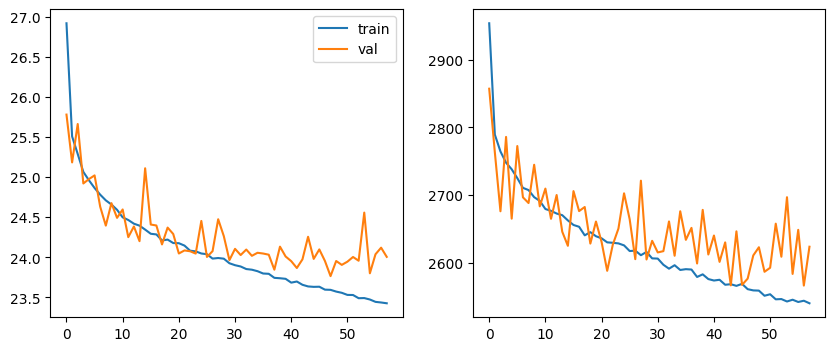

In [179]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history.history['loss'], label='train')
axs[0].plot(history.history['val_loss'], label='val')

axs[1].plot(history.history['mse'], label='train')
axs[1].plot(history.history['val_mse'], label='val')

axs[0].legend()

In [186]:
pred = model.predict(X_test_preproc)

304/304 [==============================] - 3s 3ms/step


In [220]:
pred_df = pd.concat((test_df[['id']], pd.DataFrame(pred)), axis=1).rename(columns={0: 'site_eui'})
pred_df.to_csv('pred/test.csv', index=False)